In [1]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

In [34]:
INPUT_SIZE = 28
FILTER_SIZE = 5
MP_SIZE = 2

c_layer1 = keras.layers.Conv2D(filters=6, input_shape=(INPUT_SIZE, INPUT_SIZE, 1),
                               kernel_size=FILTER_SIZE,
                               strides=1, padding='same', activation='tanh')
mp_layer1 = keras.layers.AveragePooling2D(pool_size=MP_SIZE,strides=2,padding='valid')
c_layer2 = keras.layers.Conv2D(filters=16, input_shape=(INPUT_SIZE, INPUT_SIZE, 1),
                               kernel_size=FILTER_SIZE,
                               strides=1, padding='valid', activation='tanh')
mp_layer2 = keras.layers.AveragePooling2D(pool_size=MP_SIZE,strides=2,padding='valid')
c_layer3 = keras.layers.Conv2D(filters=120, input_shape=(INPUT_SIZE, INPUT_SIZE, 1),
                               kernel_size=FILTER_SIZE,
                               strides=1, padding='valid', activation='tanh')
flatten_layer = keras.layers.Flatten()
dense_layer1 = keras.layers.Dense(units=84, activation='tanh')
output_layer = keras.layers.Dense(units=10, activation='softmax')

lenet5_model = keras.Sequential([
    c_layer1,
    mp_layer1,
    c_layer2,
    mp_layer2,
    c_layer3,
    flatten_layer,
    dense_layer1,
    output_layer
])


In [20]:
lenet5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_8 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_9 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_6 (Flatten)         (None, 120)              

In [21]:
def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-4
    elif epoch > 2 and epoch <=5:
        lr = 2e-4
    elif epoch > 5 and epoch <=9:
        lr = 5e-5
    else:
        lr = 1e-5
    return lr

In [35]:
lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule)
checkpoint = keras.callbacks.ModelCheckpoint(filepath='',monitor='val_acc',
                                             verbose=1,save_best_only=True)

lenet5_model.compile(loss='categorical_crossentropy', optimizer='sgd',
                     metrics=['accuracy'])

In [31]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1,parser='auto',as_frame=False)

X,y = mnist['data'],mnist['target']
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

X_train.shape

(60000, 784)

In [32]:
X_train = X_train.reshape(X_train.shape[0],28,28)
X_test = X_test.reshape(X_test.shape[0],28,28)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [36]:
history = lenet5_model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.4226 - accuracy: 0.8964 - val_loss: 0.1421 - val_accuracy: 0.9632
Epoch 2/10
1688/1688 [==============================] - 21s 12ms/step - loss: 0.1417 - accuracy: 0.9604 - val_loss: 0.1033 - val_accuracy: 0.9733
Epoch 3/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.1054 - accuracy: 0.9701 - val_loss: 0.0829 - val_accuracy: 0.9777
Epoch 4/10
1688/1688 [==============================] - 21s 13ms/step - loss: 0.0884 - accuracy: 0.9749 - val_loss: 0.0659 - val_accuracy: 0.9823
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0772 - accuracy: 0.9780 - val_loss: 0.0616 - val_accuracy: 0.9843
Epoch 6/10
1688/1688 [==============================] - 23s 14ms/step - loss: 0.0684 - accuracy: 0.9803 - val_loss: 0.0555 - val_accuracy: 0.9842
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0622 - accuracy: 0.9823 - val_loss: 0.0518 -

<AxesSubplot: >

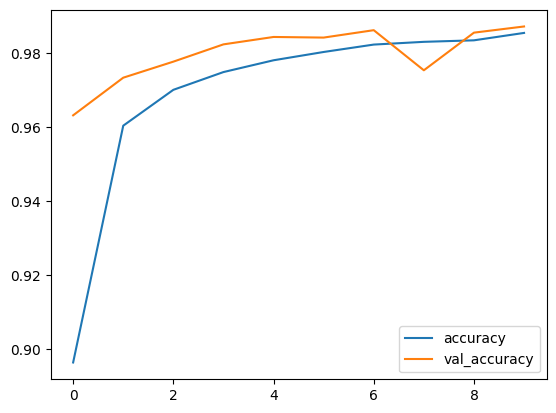

In [37]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df.loc[:,['accuracy','val_accuracy']].plot()

<AxesSubplot: >

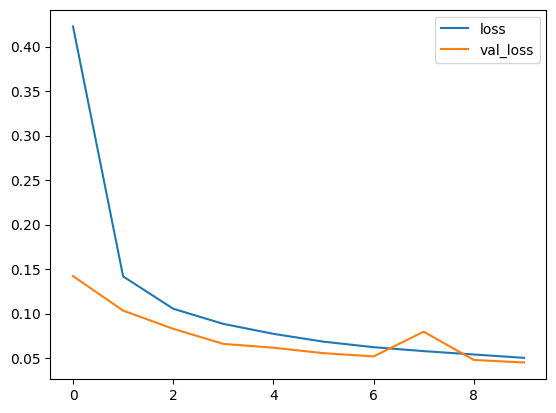

In [38]:
history_df.loc[:,['loss','val_loss']].plot()

In [39]:
lenet5_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0457 - accuracy: 0.9862


[0.04568774625658989, 0.9861999750137329]